First Python Notebook for loan prediction. First let's import the fundamental libraries and packages.

In [1]:
import warnings
## Ignoring warnings 
warnings.filterwarnings('ignore')

## Show warning for just once
#warnings.filterwarnings(action='once')
import pandas as pd
import numpy as nm
import matplotlib as plt
import ggplot as gp 
from ggplot import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
#For K-fold cross validation
from sklearn.cross_validation import KFold   
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

/workspace/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Now we will load the traning data and do some exploratory data analysis.

In [2]:
df = pd.read_csv('/workspace/python/first-notebook/loanpredict/trainData.csv')
type(df)

pandas.core.frame.DataFrame

In [3]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
def rstr(df): return df.shape, df.apply(lambda x: [x.unique()])
rstr(df)

((614, 13),
 Loan_ID              [[LP001002, LP001003, LP001005, LP001006, LP00...
 Gender                                           [[Male, Female, nan]]
 Married                                               [[No, Yes, nan]]
 Dependents                                        [[0, 1, 2, 3+, nan]]
 Education                                   [[Graduate, Not Graduate]]
 Self_Employed                                         [[No, Yes, nan]]
 ApplicantIncome      [[5849, 4583, 3000, 2583, 6000, 5417, 2333, 30...
 CoapplicantIncome    [[0.0, 1508.0, 2358.0, 4196.0, 1516.0, 2504.0,...
 LoanAmount           [[nan, 128.0, 66.0, 120.0, 141.0, 267.0, 95.0,...
 Loan_Amount_Term     [[360.0, 120.0, 240.0, nan, 180.0, 60.0, 300.0...
 Credit_History                                       [[1.0, 0.0, nan]]
 Property_Area                              [[Urban, Rural, Semiurban]]
 Loan_Status                                                   [[Y, N]]
 dtype: object)

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
columns = ['Gender','Married','Education','Dependents','Self_Employed','Property_Area','Loan_Status','Credit_History']

def giveCountsinDF(dataFrame, colum):
    for col in colum:
        print(pd.crosstab(index=dataFrame[col], columns="count"))
        #print(tmp)
        #print(dataFrame[col].value_counts())
        print("\n")

In [9]:
def infoCol(dataFrame, columns):
    data = {col : dataFrame[col].value_counts() for col in columns}
    return(data)

In [10]:
giveCountsinDF(df, columns)

col_0   count
Gender       
Female    112
Male      489


col_0    count
Married       
No         213
Yes        398


col_0         count
Education          
Graduate        480
Not Graduate    134


col_0       count
Dependents       
0             345
1             102
2             101
3+             51


col_0          count
Self_Employed       
No               500
Yes               82


col_0          count
Property_Area       
Rural            179
Semiurban        233
Urban            202


col_0        count
Loan_Status       
N              192
Y              422


col_0           count
Credit_History       
0.0                89
1.0               475




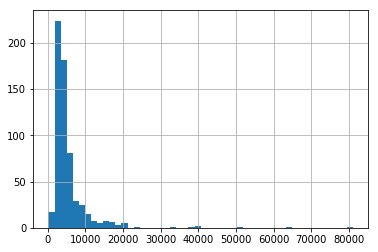

In [11]:
df['ApplicantIncome'].hist(bins=50)

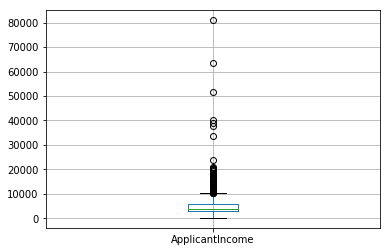

In [12]:
df.boxplot(column='ApplicantIncome')

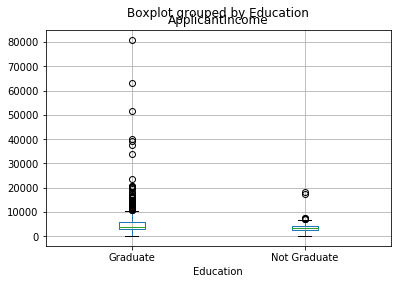

In [13]:
df.boxplot(column='ApplicantIncome', by = 'Education')

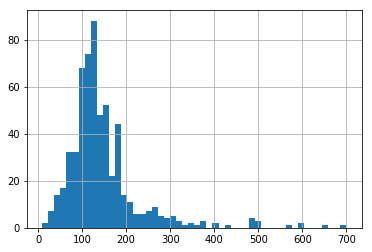

In [14]:
df['LoanAmount'].hist(bins=50)

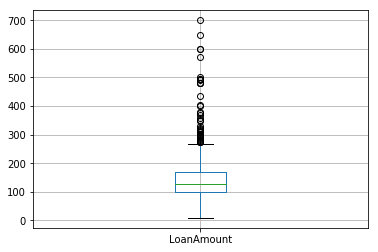

In [15]:
df.boxplot(column='LoanAmount')

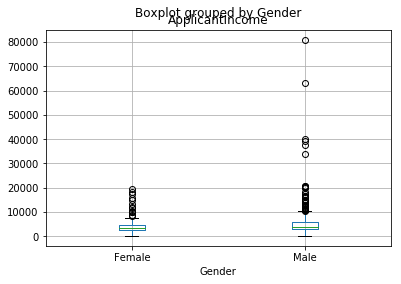

In [16]:
df.boxplot(column='ApplicantIncome', by = 'Gender')

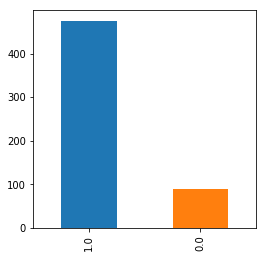

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(4,4))
df['Credit_History'].value_counts().plot(kind='bar')

In [18]:
cre_loan = pd.crosstab(index=df['Credit_History'], columns=df['Loan_Status'], margins=True)
cre_loan.columns=['L.S : N','L.S : Y',"RowTotal"]
cre_loan.index=["C.H : 0.0", "C.H : 1.0", "ColTotal"]
cre_loan

,L.S : N,L.S : Y,RowTotal
C.H : 0.0,82,7,89
C.H : 1.0,97,378,475
ColTotal,179,385,564


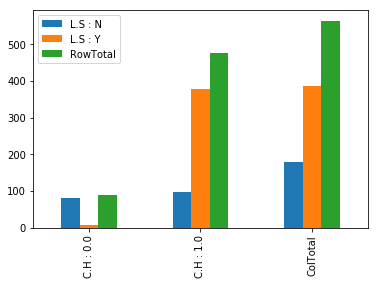

In [19]:
cre_loan.plot(kind='bar', grid=False )

In [20]:
cre_loan = pd.crosstab(index=[df['Credit_History'],df['Gender'] ], columns=df['Loan_Status'])
cre_loan

Loan_Status             N    Y
Credit_History Gender         
0.0            Female  16    1
               Male    63    6
1.0            Female  20   64
               Male    75  307

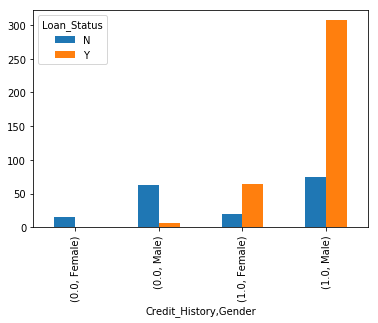

In [21]:
cre_loan.plot(kind='bar', grid=False )

Now, we have gained some background's of our data so now we will impute and clean our data.

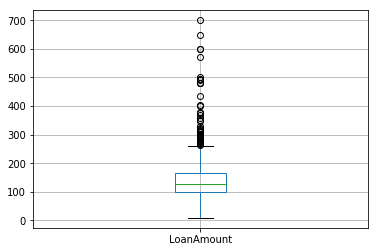

In [22]:
df['Married'].fillna("Yes", inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df.boxplot(column='LoanAmount')

In [23]:
df['Self_Employed'].fillna("No", inplace=True)
df['Loan_Amount_Term'].fillna(360.0, inplace=True)

In [24]:
def imputeMissing(outcome, predictors,dataF, valueNaN):
    tempdf = dataF[dataF[outcome] != valueNaN].index
    tempndf = dataF[dataF[outcome] == valueNaN].index
    model = RandomForestClassifier(n_estimators=100)
    model.fit(dataF.loc[tempdf, predictors], dataF.loc[tempdf, [outcome]])
    predict = model.predict(dataF.loc[tempndf, predictors])
    j=0;
    for i in tempndf:
        dataF.loc[i,outcome] = predict[j]
        j=j+1
    return(dataF)

In [25]:
var_mod = ['Married','Education','Gender','Dependents','Credit_History','Property_Area','Self_Employed','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i].astype(str))

df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area          int64
Loan_Status            int64
dtype: object

So before imputing missing values for gender, first we will seperate the indexes of with non missing values and with missing values. As with encoding label our missing values will also become new level.

In [26]:
## Impute missing values for Gender
predictors=['Married','Education','ApplicantIncome']
outcome='Gender'
df = imputeMissing(outcome,predictors,df,2)

## Impute missing values for Dependents
colPredictors =['CoapplicantIncome','Gender','Married','ApplicantIncome']
outcome='Dependents'
df = imputeMissing(outcome,colPredictors,df,4)

## Impute missing values for Credit History
colPredictors =['CoapplicantIncome','Education','Gender','Married','ApplicantIncome']
outcome='Credit_History'
df = imputeMissing(outcome,colPredictors,df,2)

Shhhh! now we have cleaned all the missing values from our data. Next we will handle the extreme values with LoanAmount and ApplicantIncome.

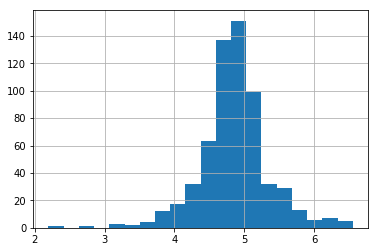

In [27]:
df['LoanAmount_log'] = nm.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

We could do some feature engineering with variable ApplicantIncome and CoapplicantIncome to a single variable TotalIncome by addition both.

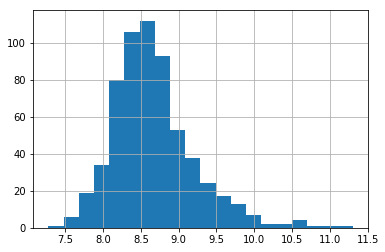

In [28]:
df['TotalIncome']=df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = nm.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

Ohhhuuuuuu! Finally we did some exploratory data analysis, get & clean the data and again did second phase of exploratory data analysis. Now our next phase is to build predictive model and do prediction. Ahh! we need to do same cleaning of data for test data too. 

In [29]:
def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
    
    #Make predictions on training set:
    predictions = model.predict(data[predictors])

    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : {0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))

    print ("Cross-Validation Score : {0:.3%}".format(nm.mean(error)))
    
    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])


In [30]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.782%
Cross-Validation Score : 80.785%


In [31]:
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.782%
Cross-Validation Score : 80.785%


In [32]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.782%
Cross-Validation Score : 80.785%


In [33]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 78.015%


TotalIncome_log     0.265883
Credit_History      0.257156
LoanAmount_log      0.226227
Dependents          0.057056
Property_Area       0.053317
Loan_Amount_Term    0.042677
Married             0.028602
Education           0.024275
Gender              0.023508
Self_Employed       0.021298
dtype: float64


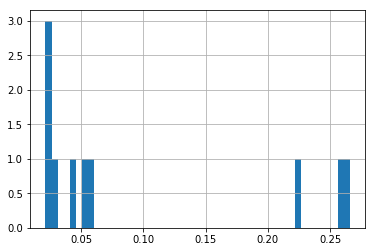

In [34]:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)
featimp.hist(bins=50)

In [35]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=20, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 83.225%
Cross-Validation Score : 80.621%
